In [126]:
import pandas as pd
import seaborn as sns
def output(filename):  ######## This function takes filename as argument and returns the contents of the file as dataframe
    df = pd.read_csv(filename)
    return df
df = output(r"World Bank Repository.csv")

In [127]:
df.info() #### Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            3140 non-null   float64
 5   1961            4546 non-null   float64
 6   1962            4727 non-null   float64
 7   1963            4587 non-null   float64
 8   1964            4643 non-null   float64
 9   1965            4679 non-null   float64
 10  1966            4690 non-null   float64
 11  1967            4859 non-null   float64
 12  1968            4711 non-null   float64
 13  1969            4718 non-null   float64
 14  1970            5987 non-null   float64
 15  1971            7338 non-null   float64
 16  1972            7545 non-null   float64
 17  1973            7358 non-null  

In [130]:
df['Indicator Name'].value_counts()  ##### Returns the counts of all the Indicator names corresponding to each country.

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

In [131]:
df['Country Name'].value_counts()   #### Returns count of each country. The counts correspond to number of indicator names


Aruba                   76
Oman                    76
Malawi                  76
Malaysia                76
North America           76
                        ..
Guyana                  76
High income             76
Hong Kong SAR, China    76
Honduras                76
Zimbabwe                76
Name: Country Name, Length: 266, dtype: int64

Country Name      Malaysia  North America      Zimbabwe         India  \
count         3.100000e+01   3.100000e+01  3.100000e+01  3.100000e+01   
mean          2.550357e+07   3.264777e+08  1.243139e+07  1.139727e+09   
std           4.417993e+06   2.765420e+07  1.193734e+06  1.563525e+08   
min           1.802982e+07   2.773735e+08  1.043241e+07  8.732778e+08   
25%           2.183872e+07   3.043468e+08  1.170017e+07  1.010192e+09   
50%           2.569062e+07   3.278245e+08  1.207670e+07  1.147610e+09   
75%           2.926856e+07   3.499323e+08  1.323276e+07  1.273311e+09   
max           3.236600e+07   3.675533e+08  1.486293e+07  1.380004e+09   

Country Name        Canada         China       Germany  
count         3.100000e+01  3.100000e+01  3.100000e+01  
mean          3.248361e+07  1.293987e+09  8.179689e+07  
std           3.025224e+06  8.113623e+07  9.361147e+05  
min           2.769114e+07  1.135185e+09  7.943303e+07  
25%           3.003056e+07  1.236005e+09  8.129736e+07  


<AxesSubplot:>

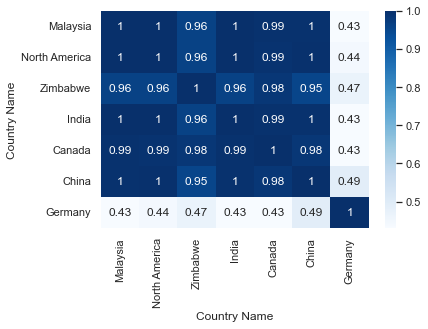

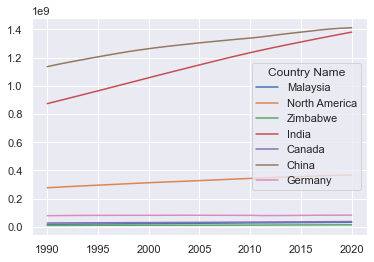

In [133]:
######## This cell contains code for analysis of the indicator total population
######## We clean the dataset by dropping all the nan values. For exploring the data analysis we take 7 countries.
######## Correlation between each country is computed and a heatmap is plotted for visual understanding of the data
######## Also statistical analysis is done on the data which includes calculating mean, standard deviation, min, max and others
######## Also for each country data over the years 1990-2020 is plotted.

df_total_population = df.loc[df['Indicator Name'] == 'Population, total']
#print(df_total_population)
df_total_population = df_total_population.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_total_population = df_total_population.dropna(how='any')
df_total_population = df_total_population.reset_index(drop=True)
df_total_population_t = df_total_population.set_index('Country Name').T
urban_x = df_total_population_t[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']].describe()
print(urban_x)
df_total_population_t = df_total_population_t[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']]
corrurban = df_total_population_t.corr()
print(corrurban)
sns.heatmap(corrurban,cmap="Blues", annot=True)
df_total_population_t.plot()

Country Name      Malaysia  North America     Zimbabwe          India  \
count            27.000000   2.700000e+01    27.000000      27.000000   
mean          65494.113963   2.422063e+06  2987.925926  330472.892111   
std           12752.110076   1.571670e+05   951.324381  127924.659584   
min           38338.485000   2.154252e+06  1609.813000  158297.056000   
25%           58129.284000   2.299957e+06  1947.177000  243881.169000   
50%           65356.941000   2.404360e+06  3164.621000  298068.428000   
75%           71906.203000   2.539368e+06  3712.837500  413382.743500   
max           89628.814000   2.699517e+06  4726.763000  648956.324000   

Country Name         Canada         China        Germany  
count             27.000000  2.700000e+01      26.000000  
mean          233901.903852  7.885055e+05  297676.623154  
std            23377.788417  3.203081e+05   36218.041889  
min           192418.491000  3.305617e+05  250800.798000  
25%           211246.702500  5.347293e+05  2588

<AxesSubplot:>

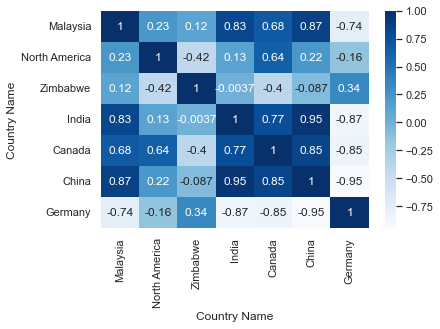

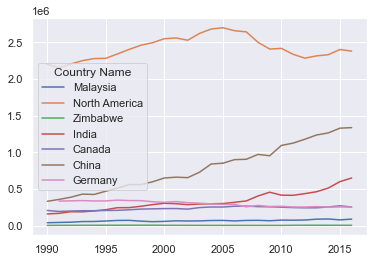

In [70]:
######## This cell contains code for analysis of the indicator CO2 emissions from liquid fuel
######## We clean the dataset by dropping all the nan values. For exploring the data analysis we take 7 countries.
######## Correlation between each country is computed and a heatmap is plotted for visual understanding of the data
######## Also statistical analysis is done on the data which includes calculating mean, standard deviation, min, max and others
######## Also for each country data over the years 1990-2020 is plotted.

df_primary = df.loc[df['Indicator Name'] == 'CO2 emissions from liquid fuel consumption (kt)']
df_primary = df_primary.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_primary = df_primary.reset_index(drop=True)
df_primary = df_primary.set_index('Country Name').T
primary_x = df_primary[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']].describe()
print(primary_x)
df_primary = df_primary[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']]
corrprimary = df_primary.corr()
print(corrprimary)
sns.heatmap(corrprimary,cmap="Blues", annot=True)
df_primary.plot()

Country Name     Malaysia  North America     Zimbabwe        India  \
count           29.000000      29.000000    29.000000    29.000000   
mean          3381.155172    5607.826504   852.220690  2487.803448   
std            441.217879    1099.653051   346.943967   381.724199   
min           2740.300000    3895.818088   309.700000  1891.200000   
25%           3031.900000    4846.748952   579.100000  2187.300000   
50%           3314.900000    5423.214235   795.400000  2411.600000   
75%           3734.700000    6332.699013  1134.600000  2856.700000   
max           4250.800000    7809.845802  1625.400000  3247.900000   

Country Name       Canada        China      Germany  
count           29.000000    29.000000    29.000000  
mean          3125.289655  5188.796552  6566.006897  
std            549.679172   566.002563   658.786616  
min           2375.400000  4237.300000  5335.600000  
25%           2647.000000  4802.200000  6182.900000  
50%           3046.300000  5189.800000  6484.

<AxesSubplot:>

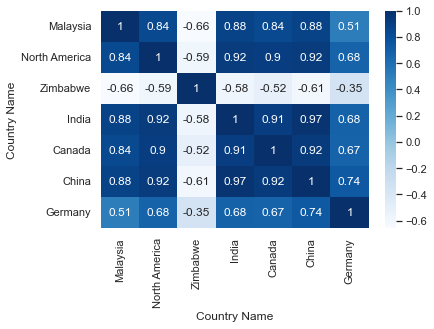

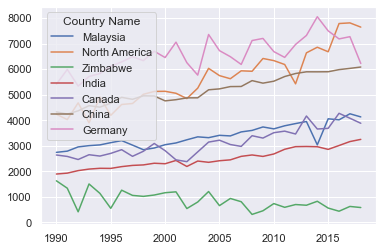

In [134]:
######## This cell contains code for analysis of the indicator cereal yield
######## We clean the dataset by dropping all the nan values. For exploring the data analysis we take 7 countries.
######## Correlation between each country is computed and a heatmap is plotted for visual understanding of the data
######## Also statistical analysis is done on the data which includes calculating mean, standard deviation, min, max and others
######## Also for each country data over the years 1990-2020 is plotted.

df_cereal = df.loc[df['Indicator Name'] == 'Cereal yield (kg per hectare)']
df_cereal = df_cereal.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_cereal = df_cereal.reset_index(drop=True)
df_cereal = df_cereal.set_index('Country Name').T
cereal_x = df_cereal[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']].describe()
print(cereal_x)
df_cereal = df_cereal[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']]
corrable = df_cereal.corr()
print(corrable)
sns.heatmap(corrable,cmap="Blues", annot=True)
df_cereal.plot()

Country Name   Malaysia  North America   Zimbabwe      India     Canada  \
count         29.000000      29.000000  29.000000  29.000000  29.000000   
mean           2.682336      11.505436   9.518971  53.625161   4.426843   
std            0.143528       0.673849   1.074593   0.818211   0.159827   
min            2.443159      10.629996   7.522295  52.608814   4.158678   
25%            2.571907      10.834506   8.788936  52.798173   4.292523   
50%            2.669305      11.499907   9.822929  53.706961   4.455814   
75%            2.819967      12.062575  10.339925  54.288155   4.577167   
max            2.944757      12.526801  10.986170  54.977650   4.613974   

Country Name      China    Germany  
count         29.000000  29.000000  
mean          12.828545  33.872078  
std            0.161970   0.315017  
min           12.678246  32.844499  
25%           12.697844  33.814557  
50%           12.800417  33.906711  
75%           12.896634  34.040358  
max           13.320891  34.

<AxesSubplot:>

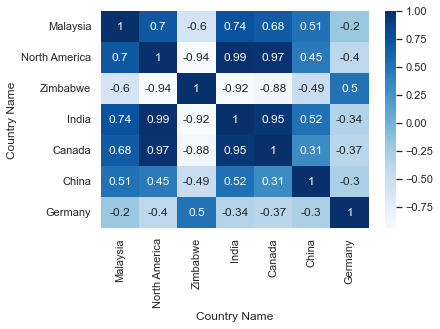

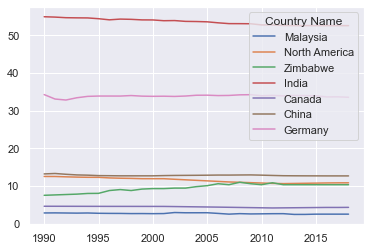

In [135]:
######## This cell contains code for analysis of the indicator agricultural land
######## We clean the dataset by dropping all the nan values. For exploring the data analysis we take 6 countries.
######## Correlation between each country is computed and a heatmap is plotted for visual understanding of the data
######## Also statistical analysis is done on the data which includes calculating mean, standard deviation, min, max and others
######## Also for each country data over the years 1990-2020 is plotted.

df_agri = df.loc[df['Indicator Name'] == 'Arable land (% of land area)']
df_agri = df_agri.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_agri = df_agri.reset_index(drop=True)
df_agri = df_agri.set_index('Country Name').T
agri_x = df_agri[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']].describe()
print(agri_x)
df_agri = df_agri[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']]
corragri = df_agri.corr()
print(corragri)
sns.heatmap(corragri,cmap="Blues", annot=True)
df_agri.plot()

Country Name   Malaysia  North America   Zimbabwe      India     Canada  \
count         31.000000      31.000000  31.000000  31.000000  31.000000   
mean          59.586058      36.082133  46.880264  22.994841  38.767558   
std            1.495623       0.151534   1.082781   0.791334   0.046354   
min           57.670522      35.902794  45.093912  21.504848  38.695513   
25%           58.415918      35.928245  45.987088  22.426333  38.727954   
50%           59.028671      36.060614  46.880264  23.053858  38.766226   
75%           60.639591      36.251037  47.773439  23.598223  38.806114   
max           62.756049      36.283851  48.666615  24.270228  38.845512   

Country Name      China    Germany  
count         31.000000  31.000000  
mean          20.025744  32.595580  
std            2.076112   0.123296  
min           16.673325  32.366167  
25%           18.253671  32.491011  
50%           20.033048  32.634190  
75%           21.799345  32.689584  
max           23.340596  32.

<AxesSubplot:>

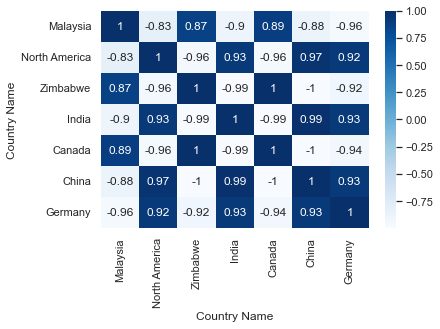

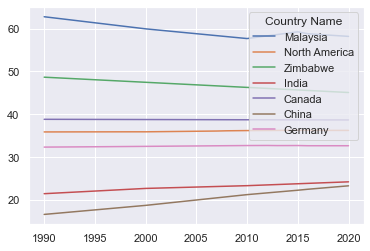

In [136]:
######## This cell contains code for analysis of the indicator forest area
######## We clean the dataset by dropping all the nan values. For exploring the data analysis we take 6 countries.
######## Correlation between each country is computed and a heatmap is plotted for visual understanding of the data
######## Also statistical analysis is done on the data which includes calculating mean, standard deviation, min, max and others
######## Also for each country data over the years 1990-2020 is plotted.

df_forest = df.loc[df['Indicator Name'] == 'Forest area (% of land area)']
df_forest = df_forest.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_forest = df_forest.reset_index(drop=True)
df_forest = df_forest.set_index('Country Name').T
forest = df_forest[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']].describe()
print(forest)
df_forest = df_forest[['Malaysia','North America','Zimbabwe','India','Canada','China','Germany']]
corrM = df_forest.corr()
print(corrM)
sns.heatmap(corrM,cmap="Blues", annot=True)
df_forest.plot()

In [137]:
### This cell calculates the correlation of all 7 countries between arable land and forest land

df_agri.corrwith(df_forest, axis = 0)

Country Name
Malaysia         0.537099
North America   -0.969289
Zimbabwe        -0.905164
India           -0.974899
Canada           0.911196
China           -0.534498
Germany          0.454543
dtype: float64

In [138]:
### This cell calculates the correlation of all 7 countries between total population and cereal yield

df_total_population_t.corrwith(df_cereal, axis = 0)

Country Name
Malaysia         0.886201
North America    0.928162
Zimbabwe        -0.598575
India            0.966196
Canada           0.899534
China            0.967947
Germany          0.249489
dtype: float64

In [139]:
### This cell calculates the correlation of all 7 countries between Total Population and CO2 emissions from liquid fuel

df_total_population_t.corrwith(df_primary, axis = 0)

Country Name
Malaysia         0.866558
North America    0.343515
Zimbabwe         0.077708
India            0.936917
Canada           0.862326
China            0.970058
Germany          0.098368
dtype: float64